# Introduction
We want to learn a function $\tau$ that maps a graph $\mathbf{G}$ and one of its node $n$ to a vector of reals:

\begin{equation}
 \tau: (\mathbf{G},n) \mapsto \mathbb{R}^m
\end{equation}

There are two broad applications of GNN. They can be classified as _graph-focused_ and _node-focused_. In graph-focused applications, $\tau$ is independent of $n$ so that $\tau: \mathbf{G} \mapsto \mathbb{R}^m$. In node-focused application, $\tau$ depends on the properties of each node $n$. GNNs are suitable for both graph- and node-focused applications.

GNNs are based on an information diffusion mechanism. A graph is processed by a set of units, each one corresponding to a node of the graph, which are linked according to the graph connectivity. The units update their states and exchange information until they reach a stable equilibrium. The output of a GNN is then computed locally at each node on the base of the unit state. The diffusion mechanism is constrained in order to ensure that a unique stable equilibrium always exists.

# Notations
$\mathbf{G}$ is a graph.It is a pair $(\mathbf{N},\mathbf{E})$, where $\mathbf{N}$ is the set of nodes and $\mathbf{E}$ is the set of edges. The set ${\rm ne}[n]$ stands for the neighbors of $n$ and the set ${\rm co}[n]$ stands for the edges that connect to $n$.

Nodes and edges may have labels represented by real vectors. The labels attached to node $n$ and edge $(n_1,n_2)$ will be represented by $\mathbf{l}_n$ and $\mathbf{l}_{(n_1,n_2)}$, respectively. Labels usually include features of objects related to nodes and features of the relationships between the objects.

Each graph $\mathbf{G}_i$ has a set of nodes $\mathbf{N}_i$ and a set of edges $\mathbf{E}_i$. The $j^{\rm th}$ node in the set $\mathbf{N}_i$ is referred to as $n_{ij}$ and the desired node-level target associated to $n_{ij}$ is referred to as $\mathbf{t}_{ij}$.

### Example
![Exemple of graphs](graphs.jpg)

$\mathbf{G}_1$ has four nodes and three edges so that 

- $\mathbf{N}_1$ is the set of nodes: $\left\{ n_{1,1} ; n_{1,2} ; n_{1,3} ; n_{1,4} \right\}$


- $\mathbf{E}_1$ is the set of edges: $\left\{ (n_{1,1},n_{1,2}) ; (n_{1,2},n_{1,3}) ; (n_{1,3},n_{1,4})\right\}$


- Each node has a target $\mathbf{t}\in\mathbb{R}^m$: $\left\{ \mathbf{t}_{1,1} ; \mathbf{t}_{1,2} ; \mathbf{t}_{1,3} ; \mathbf{t}_{1,4} \right\}$


$\mathbf{G}_2$ has five nodes and five edges so that 

- $\mathbf{N}_2 = \left\{ n_{2,1} ; n_{2,2} ; n_{2,3} ; n_{2,4} ; n_{2,5} \right\}$


- $\mathbf{E}_2 = \left\{ (n_{2,1},n_{2,2}) ; (n_{2,2},n_{2,3}) ; (n_{2,3},n_{2,4}) ; (n_{2,3},n_{2,5}) ; (n_{2,4},n_{2,5})\right\}$


- Each node has a target $\mathbf{t}\in\mathbb{R}^m$: $\left\{ \mathbf{t}_{2,1} ; \mathbf{t}_{2,2} ; \mathbf{t}_{2,3} ; \mathbf{t}_{2,4} ; \mathbf{t}_{2,5} \right\}$

The learning set $\mathcal{L}$ can be seen as all the pairs $(\mathbf{G},\mathcal{T})$ where $\mathbf{G}=(\mathbf{N}, \mathbf{E})$ is a graph and $\mathcal{T}$ is a set of pairs $\left\{ (n_i,\mathbf{t}_i) \right\}$.

# The Model
The intuitive idea underlining the GNNs is that nodes in a graph represent objects or concepts, and edges represent their relationships. Each node is naturally defined by its features and the related nodes. We define the _state_ of node $n$ by $\mathbf{x}_n$. It is a multi-dimensional real vector that is based on the information contained in the neighborhood of $n$. The state $\mathbf{x}_n$ can be used to produce an _output_ $\mathbf{o}_n$.

The _local transition function_ $f_{\mathbf{w}}$, parameterized by $\mathbf{w}$, expresses the dependence of a node $n$ on its neighborhood and the _local output function_ $g_{\mathbf{w}}$ describes how the output is produced. Since the state $\mathbf{x}_n$ of node $n$ depends on its own features, as well as those of the neighborhood, it is a function of:
- The labels (features) of node $n$: $\mathbf{l}_n$.
- The labels of its connecting edges: $\mathbf{l}_{{\rm co}[n]}$.
- The state of all its neighbors: $\mathbf{x}_n$.
- The labels (features) of all its neighbors: $\mathbf{l}_{{\rm ne}[n]}$.

We can therefore write that:
$$ \mathbf{x}_n =  f_{\mathbf{w}}\left( \mathbf{l}_n, \mathbf{l}_{{\rm co}[n]}, \mathbf{x}_n, \mathbf{l}_{{\rm ne}[n]} \right)$$

Then, based on the state and the features of node $n$, we use $g_{\mathbf{w}}$ to calculate the ouput:
$$ \mathbf{o}_n = g_{\mathbf{w}}\left( \mathbf{x}_n, \mathbf{l}_n \right) $$

Note 1: Different notions of neighborhood can be adopted. For example, we could remove the labels $\mathbf{l}_n$ since they are already included in the state $\mathbf{x}_n$. Same for $\mathbf{l}_{{\rm ne}[n]}$.

Note 2: Different transition and output functions can be used for different kind of nodes. If that's the case, an additional parameter $k$ can be used to group different the different kinds.

Let $\mathbf{x}$, $\mathbf{o}$, $\mathbf{l}$, $\mathbf{l_N}$ be the vectors constructed by stacking all the states, all the outputs, all the labels, and all the node labels, respectively. Previous equations can be rewritten in a compact form:
$$ \mathbf{x} = F_{\mathbf{w}}\left(\mathbf{x}, \mathbf{l} \right) $$

$$ \mathbf{o} = G_{\mathbf{w}}\left( \mathbf{x}, \mathbf{l_N} \right) $$

where $F_{\mathbf{w}}$ and $G_{\mathbf{w}}$ are the _global transition_ and _output functions_, respectively.

It is useful to replace the local transition function with:
$$ \mathbf{x}_n = \sum\limits_{u\in{\rm ne}[n]} h_{\mathbf{w}}\left( \mathbf{l}_n, \mathbf{l}_{(n,u)}, \mathbf{x}_u, \mathbf{l}_{u} \right), \qquad n\in\mathbf{N}$$

In order to implement the GNN model, the following items are needed:
1. A method to solve the two above equations and find the state of node $n$.
2. A learning algorithm to estimate $\mathbf{w}$ examples from the training set.
3. An implementation of the local transition and output functions.

### Example
Let's take the formaldehyde molecule as an example:
![formaldehyde](formaldehyde.jpg)

Each atom (node) has the following feature: `nuclear_charge`, `hybridization`.

Each bond (edge) has the following feature: `bond_order`

In [1]:
import pandas as pd
import numpy as np

from xyz2mol import *
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

raw_struct = pd.read_csv('/home/boris/Dropbox/Data_Science/Kaggle/Scalar_Coupling/data/structures.csv')

In [33]:
# Get molecular df from structure file
mol_df_struct = raw_struct[raw_struct['molecule_name'] == 'dsgdb9nsd_000012']

# Get atom symbols
atom_symbols = mol_df_struct['atom'].values

# Get atomic positions
xyz = mol_df_struct[['x', 'y', 'z']].values

# Get atomic numbers
atom_num_list = get_atomicNumList(atom_symbols)

# Create molecule and adjacency matrix
factor = 1.30
adj_mat, mol = xyz2mol(atom_num_list, 0, xyz, True, True, factor)

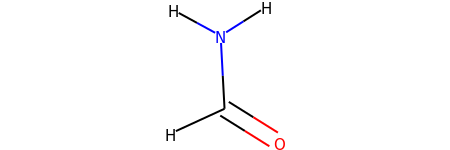

In [34]:
mol

In [4]:
def one_hot_encoding(x, set):
    one_hot = [int(x == s) for s in set]
    if 0:
        if sum(one_hot)==0: print('one_hot_encoding() return NULL!', x, set)
    return one_hot

In [5]:
def get_simple_angle(atom1, atom2, atom3):
    
    # Get positions of atoms
    pos_1 = xyz[atom1]
    pos_2 = xyz[atom2]
    pos_3 = xyz[atom3]
    
    # Calculate vector coordinates
    vec_1 = pos_1-pos_3
    vec_2 = pos_2-pos_3
    
    # Calculate angle
    angle = np.arccos(np.dot(vec_1, vec_2)/(np.linalg.norm(vec_1)*np.linalg.norm(vec_2)))*180/np.pi
    
    return angle

In [6]:
def get_dihedral_angle(atom1, atom2, atom3, atom4):
       
    # Get positions of atoms
    pos1 = xyz[atom1]   
    pos2 = xyz[atom2]
    pos3 = xyz[atom3]
    pos4 = xyz[atom4]
    
    # Calculate plane vectors
    b1 = pos2-pos1
    b2 = pos3-pos2
    b3 = pos4-pos3
    
    # Calculate the two normal vectors    
    n1 = np.cross(b1,b2)/(np.linalg.norm(np.cross(b1,b2))+1.0e-9)
    n2 = np.cross(b2,b3)/(np.linalg.norm(np.cross(b2,b3))+1.0e-9)
    
    # Calculate angle
    u1 = n2
    u3 = b2/(np.linalg.norm(b2)+1.0e-9)
    u2 = np.cross(u3,u1)
    angle = np.arctan2(np.dot(n1,u2),np.dot(n1,u1))*180/np.pi
    
    return angle

In [7]:
def get_distance(atom1,atom2):
    return ((xyz[atom1] - xyz[atom2])**2).sum()**0.5

In [48]:
def set_edge_features(atom1, atom2, ij, ctype):
    btype = None  
    
    edge_index[ij] = [atom1.GetIdx(),atom2.GetIdx()]
    
    bond = mol.GetBondBetweenAtoms(atom1.GetIdx(),atom2.GetIdx())
    
    if bond is not None: 
        btype = bond.GetBondType()
        conjugated_bond[ij] = bond.GetIsConjugated()
        
    bond_type[ij] = one_hot_encoding(btype,BOND_TYPE)
      
    distance[ij] = get_distance(atom1.GetIdx(),atom2.GetIdx())
    
    coupling_type[ij] = one_hot_encoding(ctype,COUPLING_TYPE)

In [46]:
SYMBOL=['H', 'C', 'N', 'O', 'F']

BOND_TYPE = [
    None,
    Chem.rdchem.BondType.SINGLE,
    Chem.rdchem.BondType.DOUBLE,
    Chem.rdchem.BondType.TRIPLE,
    Chem.rdchem.BondType.AROMATIC,
]
HYBRIDIZATION=[
    Chem.rdchem.HybridizationType.UNSPECIFIED,
    Chem.rdchem.HybridizationType.SP,
    Chem.rdchem.HybridizationType.SP2,
    Chem.rdchem.HybridizationType.SP3,
]
CHIRALITY=[
    Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
    Chem.rdchem.ChiralType.CHI_TETRAHEDRAL_CW,
    Chem.rdchem.ChiralType.CHI_TETRAHEDRAL_CCW,
]

COUPLING_TYPE=[ None, 
               '1JHC', '1JHN', '1JHO', '1JHF', 
               '2JHC', '2JHN', '2JHO', '2JHF', '2JHH',
               '3JHC', '3JHN', '3JHO', '3JHF', '3JHH']

num_atom = mol.GetNumAtoms()
symbol   = np.zeros((num_atom,len(SYMBOL)),np.uint8) #category
acceptor = np.zeros((num_atom,1),np.uint8)
donor    = np.zeros((num_atom,1),np.uint8)
aromatic = np.zeros((num_atom,1),np.uint8)
hybridization = np.zeros((num_atom,len(HYBRIDIZATION)),np.uint8)
num_h  = np.zeros((num_atom,1),np.float32)#real
atomic = np.zeros((num_atom,1),np.float32)
chirality = np.zeros((num_atom,len(CHIRALITY)),np.uint8)

for atom in mol.GetAtoms():
    i = atom.GetIdx()
    symbol[i]        = one_hot_encoding(atom.GetSymbol(),SYMBOL)
    aromatic[i]      = atom.GetIsAromatic()
    hybridization[i] = one_hot_encoding(atom.GetHybridization(),HYBRIDIZATION)
    num_h[i]  = atom.GetTotalNumHs(includeNeighbors=True)
    atomic[i] = atom.GetAtomicNum()
    chirality[i] = one_hot_encoding(atom.GetChiralTag(),CHIRALITY)

num_edge = num_atom**2
edge_index = np.zeros((num_edge,2),np.uint8)
distance   = np.zeros((num_edge,1),np.float32)
bond_type  = np.zeros((num_edge,len(BOND_TYPE)),np.uint8)
conjugated_bond = 
simple_angles = np.full((num_edge),np.nan)
dihedral_angles = np.full((num_edge),np.nan)
coupling_type = np.zeros((num_edge,len(COUPLING_TYPE)),np.uint8)

ij = 0
ctype = None
    
for atom1 in mol.GetAtoms():
    # First nearest neighbors
    for atom2 in atom1.GetNeighbors():
        if any((edge_index[:]==[atom1.GetIdx(),atom2.GetIdx()]).all(1)): continue
            
        # Set coupling type
        if atom1.GetSymbol() == 'H': ctype = '1JH' + atom2.GetSymbol()
            
        set_edge_features(atom1, atom2, ij, ctype)
        
        ij+=1

        # Second nearest neighbors
        for atom3 in atom2.GetNeighbors():
            if atom3.GetIdx() == atom1.GetIdx(): continue
            if any((edge_index[:]==[atom1.GetIdx(),atom3.GetIdx()]).all(1)): continue
                    
            # Set coupling type
            if atom1.GetSymbol() == 'H': ctype = '2JH' + atom3.GetSymbol()
            
            set_edge_features(atom1, atom3, ij, ctype)
            simple_angles[ij] = get_simple_angle(atom1.GetIdx(),atom2.GetIdx(),atom3.GetIdx())
            
            ij+=1
            
            # Third nearest neighbors
            for atom4 in atom3.GetNeighbors():
                if (   atom4.GetIdx() == atom1.GetIdx()
                    or atom4.GetIdx() == atom2.GetIdx()): continue 
                if any((edge_index[:]==[atom1.GetIdx(),atom4.GetIdx()]).all(1)): continue
                
                # Set coupling type
                if atom1.GetSymbol() == 'H': ctype = '3JH' + atom4.GetSymbol()
                
                set_edge_features(atom1, atom4, ij, ctype)
                dihedral_angles[ij] = get_dihedral_angle(atom1.GetIdx(), atom2.GetIdx(), 
                                                         atom3.GetIdx(), atom4.GetIdx())
                
                ij+=1

# Resize all arrays
edge_index = edge_index[:ij,:]
bond_type = bond_type[:ij,:]
distance = distance[:ij,:]
simple_angles = simple_angles[:ij]
dihedral_angles = dihedral_angles[:ij]
coupling_type = coupling_type[:ij,:]

# Sanity check
from collections import Counter

frequencies = Counter(map(tuple,edge_index))

for key, val in frequencies.items():
    if val > 1: print('Edge ' + str(key) + ' is counted ' + str(val) + ' times.')

In [47]:
bond_type

array([[0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)